# Problem Statement

One of the challenge for all Pharmaceutical companies is to understand the persistency  of drug as per the physician prescription. 

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset. 
Target Variable: Persistency_Flag
Variable description is attached along with the data.
Model Evaluation:

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx','Dataset')
print(data.shape, "\n", "\n", 50 * '*',"\n")
print(data.info())


(3424, 69) 
 
 ************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
Ptid                                                                  3424 non-null object
Persistency_Flag                                                      3424 non-null object
Gender                                                                3424 non-null object
Race                                                                  3424 non-null object
Ethnicity                                                             3424 non-null object
Region                                                                3424 non-null object
Age_Bucket                                                            3424 non-null object
Ntm_Speciality                                                        3424 non-null object
Ntm_Specialist_Flag                                                   3424 non-null object
Ntm_Sp

** There are overall 69 variables in which are 2 numerical variables (Count_Of_Risks, Dexa_Freq_During_Rx) and 67 categorical variables. Target variable is Persistency_Flag (categorical variable) **

In [103]:
print("Null values in data : " , "\n", data.isnull().sum())

Null values in data :  
 Ptid                                                               0
Persistency_Flag                                                   0
Gender                                                             0
Race                                                               0
Ethnicity                                                          0
Region                                                             0
Age_Bucket                                                         0
Ntm_Speciality                                                     0
Ntm_Specialist_Flag                                                0
Ntm_Speciality_Bucket                                              0
Gluco_Record_Prior_Ntm                                             0
Gluco_Record_During_Rx                                             0
Dexa_Freq_During_Rx                                                0
Dexa_During_Rx                                                     0
Frag_Frac

** There are no null values in the dataset **

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


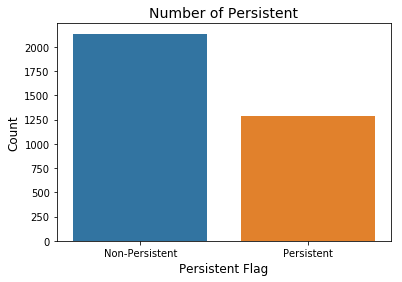

In [104]:
cases_count = data.Persistency_Flag.value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(6,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of Persistent', fontsize=14)
plt.xlabel('Persistent Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Non-Persistent', 'Persistent'])
plt.show()

**As we can see data is highly imbalanced. This situation is very normal when it comes to medical data. **

In [105]:

data_num = data[['Count_Of_Risks', 'Dexa_Freq_During_Rx']]

In [106]:

df = data.drop(columns = ['Count_Of_Risks', 'Dexa_Freq_During_Rx'])

In [107]:
from sklearn.preprocessing import LabelEncoder

data_encoded = df.apply(LabelEncoder().fit_transform)


In [108]:
print(data_encoded.head())

   Ptid  Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0     0                 1       1     2          1       4           3   
1  1111                 0       1     1          1       4           0   
2  2222                 0       0     3          0       0           1   
3  2758                 0       0     2          1       0           3   
4  2869                 0       0     2          1       0           3   

   Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  \
0               5                    0                      1   
1               5                    0                      1   
2               5                    0                      1   
3               5                    0                      1   
4               5                    0                      1   

           ...           Risk_Chronic_Liver_Disease  \
0          ...                                    0   
1          ...                                    0   

In [109]:
# Concat encoded variables with existed numerical variables

df_final = pd.concat([data_num, data_encoded], axis = 1)
print(df_final.head())


   Count_Of_Risks  Dexa_Freq_During_Rx  Ptid  Persistency_Flag  Gender  Race  \
0               0                    0     0                 1       1     2   
1               0                    0  1111                 0       1     1   
2               2                    0  2222                 0       0     3   
3               1                    0  2758                 0       0     2   
4               1                    0  2869                 0       0     2   

   Ethnicity  Region  Age_Bucket  Ntm_Speciality          ...           \
0          1       4           3               5          ...            
1          1       4           0               5          ...            
2          0       0           1               5          ...            
3          1       0           3               5          ...            
4          1       0           3               5          ...            

   Risk_Chronic_Liver_Disease  Risk_Family_History_Of_Osteoporosis  \
0   

In [110]:
X = df_final.drop(columns=['Persistency_Flag'])   # independent variables
y = df_final['Persistency_Flag']      # dependent variable
print(X.shape, "\n", y.shape)

(3424, 68) 
 (3424,)


In [111]:
from sklearn.model_selection import train_test_split 
  
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
  
# describes info about train and test set 
print("X_train dataset shape: ", X_train.shape) 
print("y_train dataset shape: ", y_train.shape) 
print("X_test dataset shape: ", X_test.shape) 
print("y_test dataset shape: ", y_test.shape) 

X_train dataset shape:  (2294, 68)
y_train dataset shape:  (2294,)
X_test dataset shape:  (1130, 68)
y_test dataset shape:  (1130,)


### Now train the model without handling the imbalanced class distribution 


In [112]:
# logistic regression object 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 


lr = LogisticRegression() 

# train the model on train set 
lr.fit(X_train, y_train.ravel()) 

predictions = lr.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.82      0.87      0.85       709
           1       0.76      0.69      0.72       421

    accuracy                           0.80      1130
   macro avg       0.79      0.78      0.78      1130
weighted avg       0.80      0.80      0.80      1130



/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Using SMOTE Algorithm to oversample the minority class 

In [113]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 868
Before OverSampling, counts of label '0': 1426 

After OverSampling, the shape of train_X: (2852, 68)
After OverSampling, the shape of train_y: (2852,) 

After OverSampling, counts of label '1': 1426
After OverSampling, counts of label '0': 1426


In [114]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.85      0.76      0.81       709
           1       0.66      0.78      0.72       421

    accuracy                           0.77      1130
   macro avg       0.76      0.77      0.76      1130
weighted avg       0.78      0.77      0.77      1130



/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Using NearMiss Algorithm to downsample majority class 

In [115]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Undersampling, counts of label '1': 868
Before Undersampling, counts of label '0': 1426 

After Undersampling, the shape of train_X: (1736, 68)
After Undersampling, the shape of train_y: (1736,) 

After Undersampling, counts of label '1': 868
After Undersampling, counts of label '0': 868


In [116]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       709
           1       0.68      0.77      0.72       421

    accuracy                           0.78      1130
   macro avg       0.77      0.78      0.77      1130
weighted avg       0.79      0.78      0.78      1130



/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


** As nearmiss algorithm downsampling technique giving better performance (Accuracy & F1 Score) than SMOTE. I will use dowsample data for other models and selec the model with the best overall performance at the end. **

In [117]:
labels=['Non-Persistent', 'Persistent']


### Function to plot the confusion matrix
 

In [118]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 22)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

### Generic function to run any model specified 

In [119]:
from datetime import datetime
def perform_model(model, X_train_miss, y_train_miss, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train_miss, y_train_miss)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes 

In [120]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## Logistic Regression with Grid Search 

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Done 
 

training_time(HH:MM:SS.ms) - 0:00:01.143828


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000877


---------------------
|      Accuracy      |
---------------------

    0.7787610619469026


--------------------
| Confusion Matrix |
--------------------

 [[557 152]
 [ 98 323]]
Normalized confusion matrix
[[0.78561354 0.21438646]
 [0.2327791  0.7672209 ]]


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.1s finished
/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


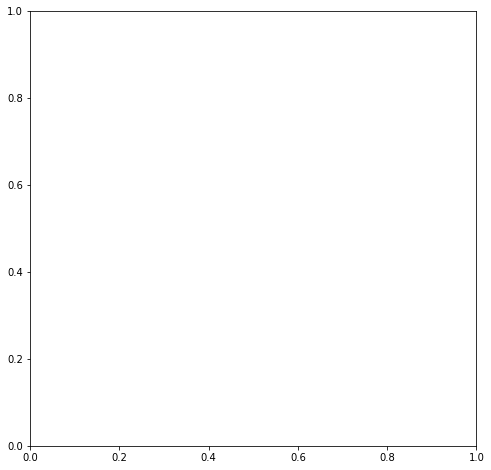

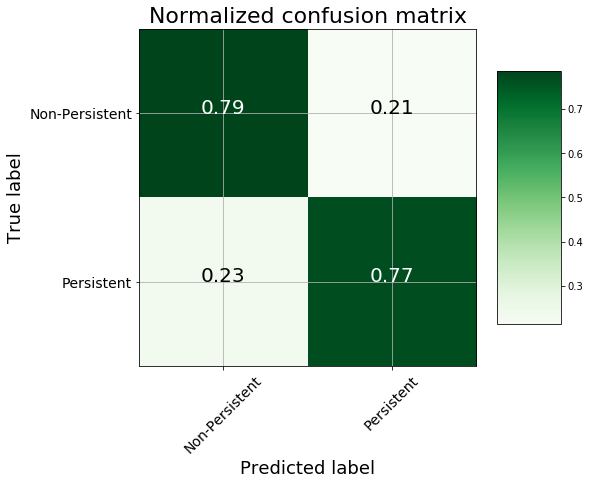

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       709
           1       0.68      0.77      0.72       421

    accuracy                           0.78      1130
   macro avg       0.77      0.78      0.77      1130
weighted avg       0.79      0.78      0.78      1130



In [121]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV



# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)

In [122]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8024036191739725



In [123]:
# train the LR model on best parameters

lr_model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
lr_model.fit(X_train_miss, y_train_miss.ravel()) 

# Actual class predictions
predictions = lr_model.predict(X_test) 

# Probabilities for each class
lr_probs = lr_model.predict_proba(X_test)[:, 1]

/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


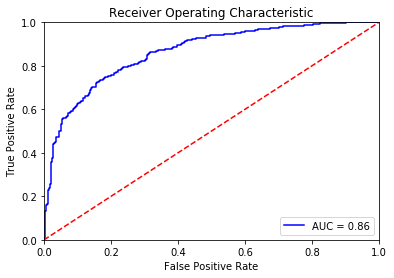

In [124]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [125]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, lr_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")

RoC-AuC Score :  0.86 



## LinearSVC with Grid Search 

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished
/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.927787


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000961


---------------------
|      Accuracy      |
---------------------

    0.7619469026548673


--------------------
| Confusion Matrix |
--------------------

 [[567 142]
 [127 294]]
Normalized confusion matrix
[[0.79971791 0.20028209]
 [0.30166271 0.69833729]]


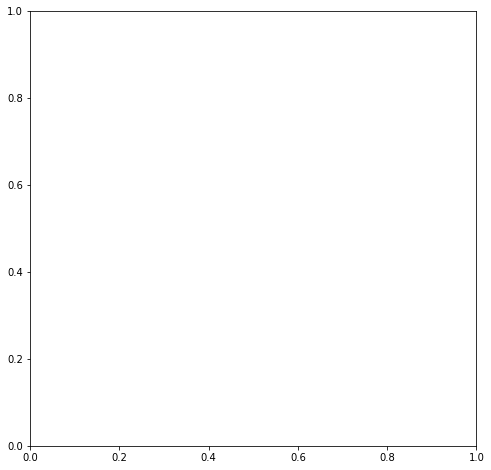

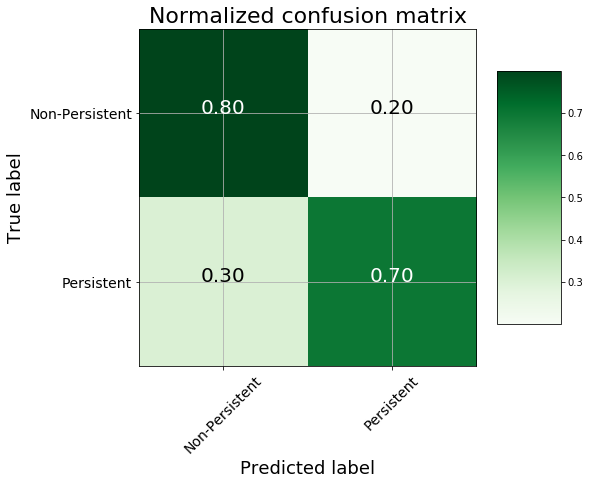

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       709
           1       0.67      0.70      0.69       421

    accuracy                           0.76      1130
   macro avg       0.75      0.75      0.75      1130
weighted avg       0.76      0.76      0.76      1130



In [126]:
from sklearn.svm import LinearSVC


parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)

In [127]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7453608930405116



In [128]:
# train the Linear SVC model on best parameters

lr_svc_model = LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0) 
lr_svc_model.fit(X_train_miss, y_train_miss.ravel()) 

# Actual class predictions
lr_svc_predictions = lr_model.predict(X_test) 

# Probabilities for each class
lr_svc_probs = lr_model.predict_proba(X_test)[:, 1]





/home/brt/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


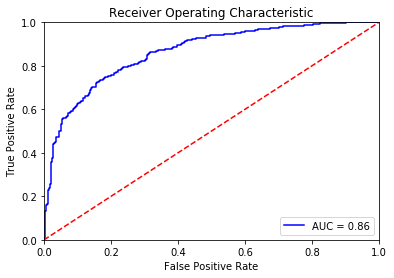

In [129]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_svc_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, lr_svc_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")

RoC-AuC Score :  0.86 



## Kernel SVM with Grid Search 

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.171611


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.136456


---------------------
|      Accuracy      |
---------------------

    0.5991150442477876


--------------------
| Confusion Matrix |
--------------------

 [[371 338]
 [115 306]]
Normalized confusion matrix
[[0.52327221 0.47672779]
 [0.27315914 0.72684086]]


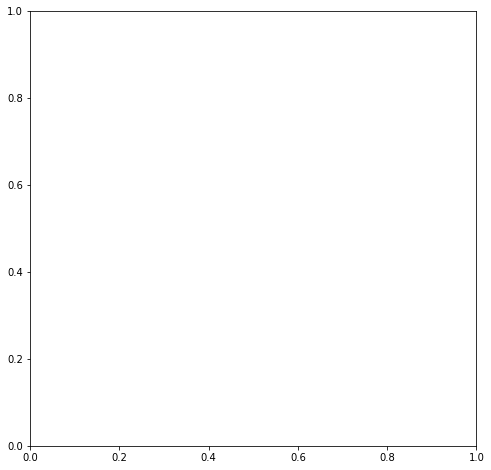

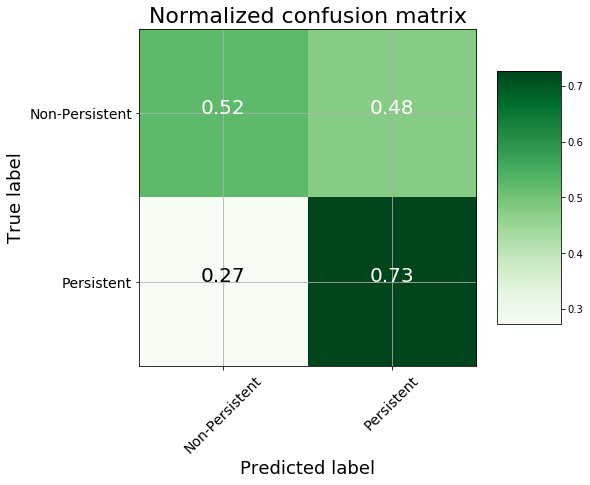

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       709
           1       0.48      0.73      0.57       421

    accuracy                           0.60      1130
   macro avg       0.62      0.63      0.60      1130
weighted avg       0.66      0.60      0.60      1130



In [131]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)

In [132]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.5651694325747789



In [133]:
# train the Kernel SVM model on best parameters

rbf_model = SVC(C=8,break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
rbf_model.fit(X_train_miss, y_train_miss.ravel()) 

# Actual class predictions
rbf_predictions = rbf_model.predict(X_test) 

# Probabilities for each class
rbf_probs = rbf_model.predict_proba(X_test)[:, 1]


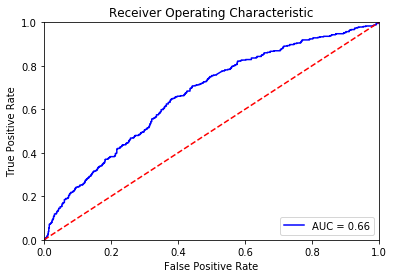

In [134]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, rbf_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [135]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rbf_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")

RoC-AuC Score :  0.66 



## Decision Tree with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.150914


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001116


---------------------
|      Accuracy      |
---------------------

    0.7592920353982301


--------------------
| Confusion Matrix |
--------------------

 [[569 140]
 [132 289]]
Normalized confusion matrix
[[0.80253879 0.19746121]
 [0.31353919 0.68646081]]


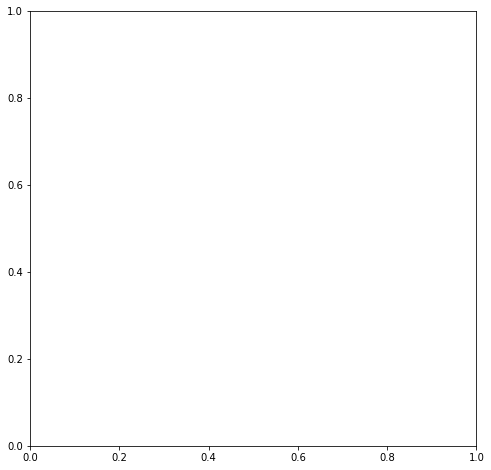

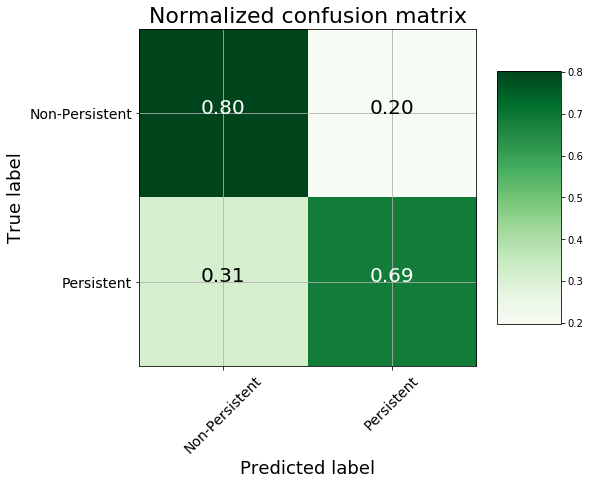

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       709
           1       0.67      0.69      0.68       421

    accuracy                           0.76      1130
   macro avg       0.74      0.74      0.74      1130
weighted avg       0.76      0.76      0.76      1130



In [136]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)


In [137]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7776408625658352



In [138]:
# train the Decision Tree model on best parameters

dt_model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
dt_model.fit(X_train_miss, y_train_miss.ravel()) 


# Actual class predictions
dt_predictions = dt_model.predict(X_test) 

# Probabilities for each class
dt_probs = dt_model.predict_proba(X_test)[:, 1]


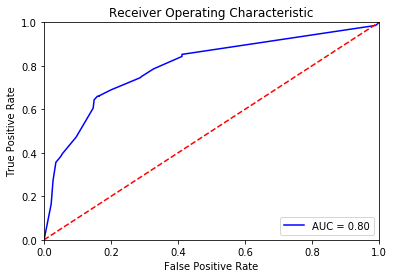

In [139]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, dt_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [140]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, dt_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")

RoC-AuC Score :  0.8 



## Random Forest Model with Grid Search 

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:08.567508


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.017821


---------------------
|      Accuracy      |
---------------------

    0.7955752212389381


--------------------
| Confusion Matrix |
--------------------

 [[574 135]
 [ 96 325]]
Normalized confusion matrix
[[0.80959097 0.19040903]
 [0.2280285  0.7719715 ]]


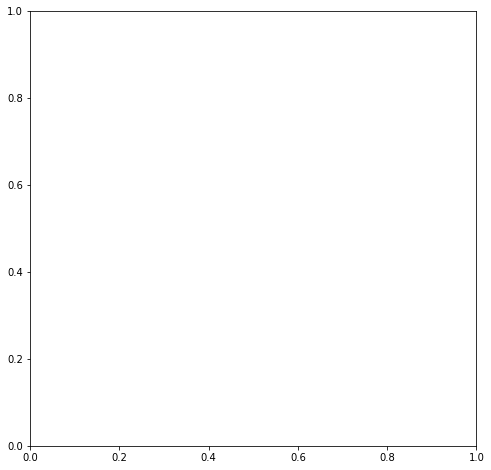

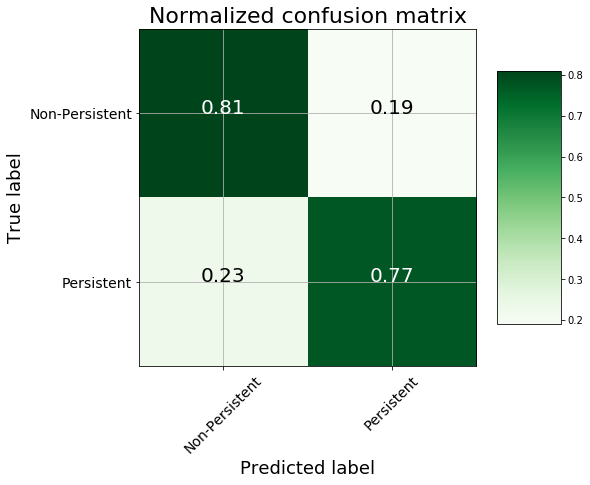

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       709
           1       0.71      0.77      0.74       421

    accuracy                           0.80      1130
   macro avg       0.78      0.79      0.79      1130
weighted avg       0.80      0.80      0.80      1130



In [141]:

from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)


In [142]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 90}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------

In [143]:
# train the Random Forest model on best parameters

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
rf_model.fit(X_train_miss, y_train_miss.ravel()) 


# Actual class predictions
rf_predictions = rf_model.predict(X_test) 

# Probabilities for each class
rf_probs = rf_model.predict_proba(X_test)[:, 1]



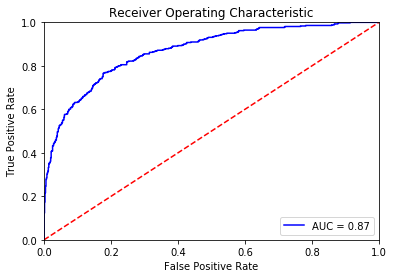

In [144]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, rf_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [145]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")


RoC-AuC Score :  0.87 



In [146]:
# Feature Importance

fi = pd.DataFrame({'feature': list(X_train_miss.columns),
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)


print(fi.head(10))

                                              feature  importance
1                                 Dexa_Freq_During_Rx    0.132566
13                                     Dexa_During_Rx    0.097216
2                                                Ptid    0.051218
31              Comorb_Long_Term_Current_Drug_Therapy    0.048724
25  Comorb_Encounter_For_Screening_For_Malignant_N...    0.043516
26                  Comorb_Encounter_For_Immunization    0.038293
27  Comorb_Encntr_For_General_Exam_W_O_Complaint,_...    0.036183
8                                      Ntm_Speciality    0.029972
33  Comorb_Personal_History_Of_Other_Diseases_And_...    0.023987
6                                              Region    0.020239


## Gradient Boosting Classifier with Grid Search 

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.224826


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.005302


---------------------
|      Accuracy      |
---------------------

    0.7778761061946903


--------------------
| Confusion Matrix |
--------------------

 [[542 167]
 [ 84 337]]
Normalized confusion matrix
[[0.76445698 0.23554302]
 [0.19952494 0.80047506]]


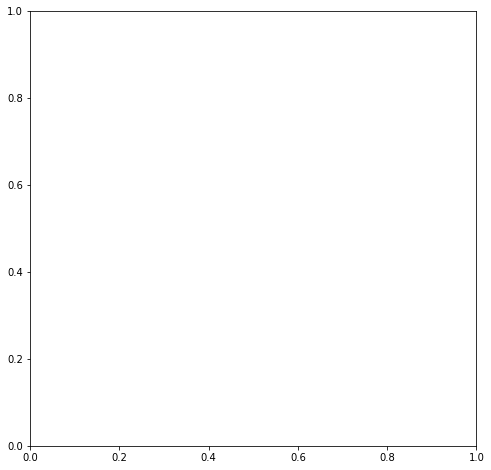

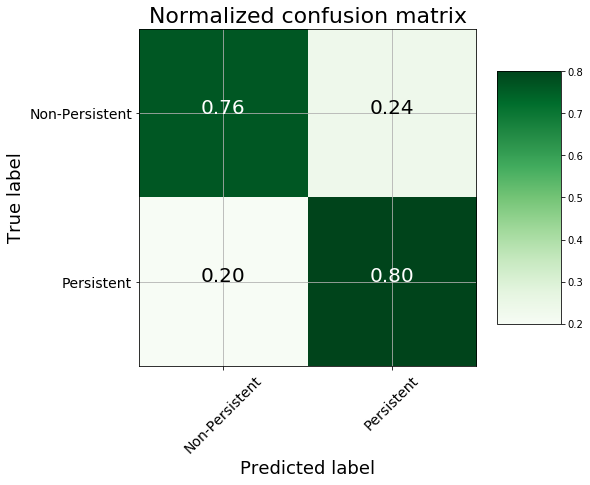

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       709
           1       0.67      0.80      0.73       421

    accuracy                           0.78      1130
   macro avg       0.77      0.78      0.77      1130
weighted avg       0.79      0.78      0.78      1130



In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train_miss, y_train_miss, X_test, y_test, class_labels=labels)


In [148]:
print_grid_search_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 140}

---------------------------------
|   No of CrossValidation se

In [149]:
# train the GBDT model on best parameters

gbdt_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
gbdt_model.fit(X_train_miss, y_train_miss.ravel()) 


# Actual class predictions
gbdt_predictions = gbdt_model.predict(X_test) 

# Probabilities for each class
gbdt_probs = gbdt_model.predict_proba(X_test)[:, 1]



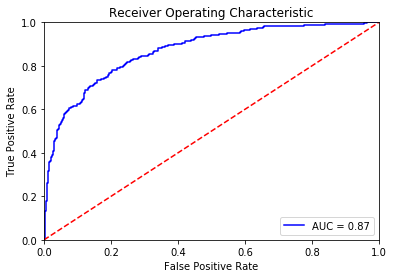

In [150]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, gbdt_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [151]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, gbdt_probs), 
print("RoC-AuC Score : ",float("%.2f" %roc_value[0]), "\n")


RoC-AuC Score :  0.87 



# Comparing all models

In [152]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 77.88%       22.12%
Linear SVC          : 76.19%       23.81% 
rbf SVM classifier  : 59.91%      40.09% 
DecisionTree        : 75.93%      24.07% 
Random Forest       : 79.56%      20.44% 
GradientBoosting DT : 77.79%      22.21% 


# Conclusion


Random Forest Model is giving best performance than other model while Linear SVC is worst performer among all.



### Random Forest Results

- **Accuracy**: 80 %
- **AuC-RoC Score**: 0.87
- ** Weighted avg F1 Score**: 0.80
